In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 

from matplotlib import pyplot as plt
import seaborn as sns

In [16]:
# Use 2019 data with data collected by SCA removed or 2018 data

# 2018 All Data
ss2018_data_path = r'E:/SurvivalStudyDataAnalysis/Data/SS_Data_sty.csv'
ss18 = pd.read_csv(ss2018_data_path, sep=',')

# 2018 SCA Removed
ss2018_sca_removed = r'E:/SurvivalStudyDataAnalysis/Data/SS_Data_sty_scaremoved2.csv'
ss18_nosca = pd.read_csv(ss2018_sca_removed, sep=',')

# 2017 All Data
ss2017_data_path = r'E:/SurvivalStudyDataAnalysis/Data/SS_Data_2017.csv'
ss17 = pd.read_csv(ss2017_data_path, sep=',')

In [21]:
ss18.columns

Index(['FID', 'CT_Tag_ID', 'Date_Ptd', 'Cultivar', 'SciName', 'CmmnName',
       'DBH', 'Program', 'EventORAdd', 'Impervious', 'DBH1', 'DBH2', 'DBH3',
       'DBH4', 'TotalHeigh', 'Width_NS', 'Width_EW', 'PercentMis',
       'CrownCondi', 'TreeStruct', 'SpaceType1', 'CrownBase', 'Jurisdicti',
       'SpaceTypeD', 'Cond_18', 'SpaceType', 'Condition', 'DDOE', 'PTG_Notes',
       'Cond_12', 'Genus', 'Species', 'StockType', 'Class_Code', 'Mntc_Condn',
       'Season', 'Nursery', 'Condit_13', 'POINT_X', 'POINT_Y', 'Cond_17',
       'Cond_16', 'Cond_15', 'Cond_14', 'db_jdx', 'db_year', 'db_Season',
       'db_removed', 'db_SpaceTy', 'db_Prog', 'db_StockT', 'db_ClassCo',
       'db_Nursery', 'db_Genus', 'db_Species', 'db_mtc', 'db_pltdbh',
       'isAlive', 'Death_Yr', 'Death_Age', 'Age', 'Cond_Agg'],
      dtype='object')

In [28]:
null_cols = ss18.isnull().sum()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(null_cols)

FID             0
CT_Tag_ID       0
Date_Ptd        0
Cultivar        0
SciName         0
CmmnName        0
DBH             0
Program         0
EventORAdd      0
Impervious      0
DBH1            0
DBH2            0
DBH3            0
DBH4            0
TotalHeigh      0
Width_NS        0
Width_EW        0
PercentMis      0
CrownCondi      0
TreeStruct      0
SpaceType1      0
CrownBase       0
Jurisdicti      0
SpaceTypeD      0
Cond_18       122
SpaceType       0
Condition       0
DDOE            0
PTG_Notes       0
Cond_12         1
Genus           0
Species         0
StockType       0
Class_Code      0
Mntc_Condn      0
Season          0
Nursery         0
Condit_13       0
POINT_X         0
POINT_Y         0
Cond_17        44
Cond_16         0
Cond_15         0
Cond_14       165
db_jdx          0
db_year         0
db_Season       0
db_removed      0
db_SpaceTy      0
db_Prog         0
db_StockT       0
db_ClassCo      0
db_Nursery      0
db_Genus        0
db_Species      0
db_mtc    

In [59]:
ss = ss17.drop(['FID', 'CT_Tag_ID', 'EventORAdd', 'PercentMis','POINT_X', 'POINT_Y', 'Impervious','Cond_18','Cond_17',
       'Cond_16', 'Cond_15', 'Cond_14', 'Cond_12', 'Condit_13','db_year', 'db_ClassCo', 'db_pltdbh','PTG_Notes', 'db_mtc', 
        'SciName', 'SpaceTypeD', 'SpaceType', 'Condition', 'DDOE','Genus', 'Species', 'StockType','Class_Code', 'Mntc_Condn',
        'Season', 'Nursery', 'db_removed','Program','SpaceType1','TreeStruct'],
                  axis=1)
ss.columns

Index(['Date_Ptd', 'Cultivar', 'CmmnName', 'DBH', 'DBH1', 'DBH2', 'DBH3',
       'DBH4', 'TotalHeigh', 'Width_NS', 'Width_EW', 'CrownCondi', 'CrownBase',
       'Jurisdicti', 'db_jdx', 'db_Season', 'db_SpaceTy', 'db_Prog',
       'db_StockT', 'db_Nursery', 'db_Genus', 'db_Species', 'isAlive',
       'Death_Yr', 'Death_Age', 'Age', 'Cond_Agg'],
      dtype='object')

In [53]:
genus_group = ss.groupby(['db_Genus'])
genus_sum = genus_group.describe()
genus_sum

DBH                                                    \
                 count        mean          std  min   25%   50%     75%   
db_Genus                                                                   
Acer             408.0    2.766912     3.556675  0.0  0.00  2.00   4.600   
Aesculus          11.0    1.781818     1.496541  0.0  0.00  2.20   2.900   
Alnus              1.0    0.000000          NaN  0.0  0.00  0.00   0.000   
Amelanchier      345.0    0.938261     1.325746  0.0  0.00  0.00   2.000   
Amydalus           1.0    0.000000          NaN  0.0  0.00  0.00   0.000   
Arborvitae         3.0    0.000000     0.000000  0.0  0.00  0.00   0.000   
Aronia             1.0    0.000000          NaN  0.0  0.00  0.00   0.000   
Asimina           66.0    0.598485     0.885176  0.0  0.00  0.00   1.000   
Aureum             1.0    0.000000          NaN  0.0  0.00  0.00   0.000   
Betula           505.0    1.507525     2.602148  0.0  0.00  0.00   2.400   
Camellia           2.0    1.000000     1.414214  0.0  0.50  1.00   1.500   
Carnus             5.0    1.460000     1.870294  0.0  0.00  0.50   2.600   
Carpinus         189.0    2.060317     2.768317  0.0  0.00  2.00   3.000   
Carya             38.0    1.689474     1.795458  0.0  0.00  1.00   2.950   
Castanea           2.0    0.000000     0.000000  0.0  0.00  0.00   0.000   
Catalpa           15.0    3.006667     2.944842  0.0  0.00  2.50   4.150   
Cedrus            43.0    3.837209    10.359744  0.0  0.00  1.00   3.450   
Celtis            48.0    1.847917     2.552678  0.0  0.00  0.50   2.200   
Cercidiphyllum    27.0    2.218519     3.064817  0.0  0.00  0.00   3.800   
Cercis           526.0    2.626264     2.784770  0.0  0.00  2.00   4.375   
Chamaecyparis      8.0    0.900000     1.402039  0.0  0.00  0.00   1.500   
Chionanthus       91.0    1.137363     1.772797  0.0  0.00  0.00   2.000   
Citrus             1.0    0.000000          NaN  0.0  0.00  0.00   0.000   
Cladastris         5.0    2.040000     2.899655  0.0  0.00  0.00   4.000   
Cladrastis       211.0    2.320853     2.358054  0.0  0.00  2.10   3.800   
Cornus           327.0    2.035780    16.425404  0.0  0.00  0.00   2.100   
Corylus            8.0    0.250000     0.462910  0.0  0.00  0.00   0.250   
Cotinus            8.0    0.312500     0.883883  0.0  0.00  0.00   0.000   
Crataegus         20.0    1.855000     2.000651  0.0  0.00  1.90   3.125   
Cryptomeria       37.0    2.429730     3.553001  0.0  0.00  0.00   3.800   
...                ...         ...          ...  ...   ...   ...     ...   
Parrotia           1.0    0.000000          NaN  0.0  0.00  0.00   0.000   
Physocarpus        2.0    0.000000     0.000000  0.0  0.00  0.00   0.000   
Picea             13.0    1.900000     3.285321  0.0  0.00  0.00   3.000   
Pinus             80.0    2.282500     3.302235  0.0  0.00  0.00   4.550   
Pistacia          13.0    2.161538     2.955655  0.0  0.00  0.00   3.200   
Platanus         222.0    4.246847     3.801329  0.0  0.00  4.25   7.575   
Populus            1.0    0.000000          NaN  0.0  0.00  0.00   0.000   
Prunus           554.0    2.944585     3.167963  0.0  0.00  2.45   4.900   
Pyrus             55.0    1.163636     1.335327  0.0  0.00  1.00   2.100   
Quercus          666.0    3.491291     4.462334  0.0  0.00  2.00   5.800   
Rhus               3.0    1.266667     1.167619  0.0  0.75  1.50   1.900   
Robinia           12.0    3.466667     2.376527  0.0  1.50  4.05   5.250   
Salix              8.0    1.637500     2.867521  0.0  0.00  0.00   1.875   
Sambucus           5.0    0.000000     0.000000  0.0  0.00  0.00   0.000   
Sassafras          5.0    0.260000     0.581378  0.0  0.00  0.00   0.000   
Sophora           15.0    2.200000     2.028722  0.0  0.95  2.00   2.900   
Stewartia         10.0    1.630000     2.187363  0.0  0.00  0.00   3.600   
Styrax            12.0    1.441667     2.025949  0.0  0.00  0.00   3.325   
Syringa           10.0    2.200000     3.047768  0.0  0.00  2.00   

In [60]:
#ss = ss17
#ss = ss18_nosca
#ss = ss18

genus_counts = ss.db_Genus.value_counts().rename_axis('db_Genus').reset_index(name='counts')

genus_group = ss.groupby(['db_Genus'])
genus_sum = genus_group.sum()
genus_sum_drop = genus_sum.drop(['DBH', 'DBH1', 'DBH2', 'DBH3', 'DBH4', 'TotalHeigh', 
                'Width_NS', 'Width_EW', 'CrownBase',  'Death_Yr'],
                  axis=1)


genus_merge = pd.merge(genus_counts, genus_sum_drop, on='db_Genus')

genus_merge.rename(columns ={'db_Genus':'genus', 'counts':'count', 'isAlive':'sum_alive','Death_Age':'sum_death_age', 'Age':'sum_age'}, inplace = True)
genus_merge['sum_dead'] = genus_merge['count'] - genus_merge['sum_alive']

# Surivial Rate
genus_merge['survival_rate'] = genus_merge['sum_alive']/genus_merge['count'] * 100

# Mortaility Rate
genus_merge['mortality_rate'] = genus_merge['sum_dead']/genus_merge['count'] * 100

# Death per Tree Year - the number of trees in a group that have died divided by the number of years all trees in 
# that group have been in the ground
genus_merge['dptr'] = genus_merge['sum_dead']/genus_merge['sum_age'] * 100
genus_merge['dpty'] = (genus_merge['count'] * genus_merge['dptr']) / 100

genus_merge['projected_age']= genus_merge['sum_alive']/genus_merge['dpty']

genus_merge

#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    print(genus_merge)


,genus,count,sum_alive,sum_death_age,sum_age,sum_dead,survival_rate,mortality_rate,dptr,dpty,projected_age
0,Ulmus,1093,866,1613,11198,227,79.231473,20.768527,2.027148,22.156724,39.085200
1,Quercus,666,515,700,4770,151,77.327327,22.672673,3.165618,21.083019,24.427242
2,Prunus,554,406,708,3992,148,73.285199,26.714801,3.707415,20.539078,19.767197
3,Cercis,526,435,482,4075,91,82.699620,17.300380,2.233129,11.746258,37.033071
4,Magnolia,511,396,641,3870,115,77.495108,22.504892,2.971576,15.184755,26.078788
5,Betula,505,416,461,3987,89,82.376238,17.623762,2.232255,11.272887,36.902703
6,Acer,408,324,415,3233,84,79.411765,20.588235,2.598206,10.600680,30.564076
7,Amelanchier,345,264,440,2706,81,76.521739,23.478261,2.993348,10.327051,25.563929
8,Cornus,327,250,385,2118,77,76.452599,23.547401,3.635505,11.888102,21.029429
9,Nyssa,322,261,273,2183,61,81.055901,18.944099,2.794320,8.997710,29.007382


In [55]:
genus_dr = genus_death_rate 
#gnus_dr = pd.DataFrame({'db_Genus':genus_dr.index, 'death_rate':genus_dr.values})
#genus_dr = pd.DataFrame(data=genus_death_rate, index=db_Genus, columns=['death_rate'], dtype=None, copy=False)
genus_dr = pd.DataFrame(genus_dr).reset_index()
genus_dr.columns = ['db_Genus', 'death_rate']
genus_dr

NameError: name 'genus_death_rate' is not defined

In [58]:
#ss = ss17
#ss = ss18_nosca
#ss = ss18

nursery_counts = ss.db_Nursery.value_counts().rename_axis('db_Nursery').reset_index(name='counts')
nursery_group = ss.groupby(['db_Nursery'])
nursery_sum = nursery_group.sum()
nursery_sum_drop = nursery_sum.drop(['DBH', 'DBH1', 'DBH2', 'DBH3', 'DBH4', 'TotalHeigh', 
                'Width_NS', 'Width_EW', 'CrownBase',  'Death_Yr'],
                  axis=1)

nursery_merge = pd.merge(nursery_counts, nursery_sum_drop, on='db_Nursery')
nursery_merge.rename(columns ={'db_Nursery':'nursery', 'counts':'count', 'isAlive':'sum_alive','Death_Age':'sum_death_age', 'Age':'sum_age'}, inplace = True)
nursery_merge['sum_dead'] = nursery_merge['count'] - nursery_merge['sum_alive']

# Surivial Rate
nursery_merge['survival_rate'] = nursery_merge['sum_alive']/nursery_merge['count'] * 100

# Mortaility Rate
nursery_merge['mortality_rate'] = nursery_merge['sum_dead']/nursery_merge['count'] * 100

# Death per Tree Year - the number of trees in a group that have died divided by the number of years all trees in 
# that group have been in the ground
nursery_merge['dptr'] = nursery_merge['sum_dead']/nursery_merge['sum_age'] * 100
nursery_merge['dpty'] = (nursery_merge['count'] * nursery_merge['dptr']) / 100

nursery_merge['projected_age']= nursery_merge['sum_alive']/nursery_merge['dpty']

nursery_merge

,nursery,count,sum_alive,sum_death_age,sum_age,sum_dead,survival_rate,mortality_rate,dptr,dpty,projected_age
0,Bremo Trees,2629,2161,2394,19990,468,82.198555,17.801445,2.341171,61.549375,35.110024
1,Casey Tree Farm,1806,1458,1099,8327,348,80.730897,19.269103,4.179176,75.475922,19.317419
2,Rebate,1159,887,1081,7939,272,76.531493,23.468507,3.426124,39.708779,22.337629
3,Angelica,595,471,530,4187,124,79.159664,20.840336,2.961548,17.621209,26.729154
4,Riveredge Farms,593,437,1240,6881,156,73.693086,26.306914,2.267112,13.443976,32.505264
5,Ruppert,390,307,401,2896,83,78.717949,21.282051,2.866022,11.177486,27.465925
6,Kuenzi,369,310,207,1811,59,84.010840,15.989160,3.257869,12.021535,25.787056
7,Edible Landscapes,284,171,407,1468,113,60.211268,39.788732,7.697548,21.861035,7.822136
8,Merrifield,233,141,551,1969,92,60.515021,39.484979,4.672423,10.886745,12.951530
9,Shemin,224,183,181,1760,41,81.696429,18.303571,2.329545,5.218182,35.069686


In [61]:
spcty_counts = ss.db_SpaceTy.value_counts().rename_axis('db_SpaceTy').reset_index(name='counts')
spcty_group = ss.groupby(['db_SpaceTy'])
spcty_sum = spcty_group.sum()
spcty_sum_drop = spcty_sum.drop(['DBH', 'DBH1', 'DBH2', 'DBH3', 'DBH4', 'TotalHeigh', 
                'Width_NS', 'Width_EW', 'CrownBase',  'Death_Yr'],
                  axis=1)

spcty_merge = pd.merge(spcty_counts, spcty_sum_drop, on='db_SpaceTy')
spcty_merge.rename(columns ={'db_SpaceTy':'space_type', 'counts':'count', 'isAlive':'sum_alive','Death_Age':'sum_death_age', 'Age':'sum_age'}, inplace = True)
spcty_merge['sum_dead'] = spcty_merge['count'] - spcty_merge['sum_alive']

# Surivial Rate
spcty_merge['survival_rate'] = spcty_merge['sum_alive']/spcty_merge['count'] * 100

# Mortaility Rate
spcty_merge['mortality_rate'] = spcty_merge['sum_dead']/spcty_merge['count'] * 100

# Death per Tree Year - the number of trees in a group that have died divided by the number of years all trees in 
# that group have been in the ground
spcty_merge['dptr'] = spcty_merge['sum_dead']/spcty_merge['sum_age'] * 100
spcty_merge['dpty'] = (spcty_merge['count'] * spcty_merge['dptr']) / 100

spcty_merge['projected_age']= spcty_merge['sum_alive']/spcty_merge['dpty']

spcty_merge

,space_type,count,sum_alive,sum_death_age,sum_age,sum_dead,survival_rate,mortality_rate,dptr,dpty,projected_age
0,Open Land,4895,3805,5657,37845,1090,77.732380,22.267620,2.880169,140.984278,26.988825
1,,1235,932,1357,8863,303,75.465587,24.534413,3.418707,42.221031,22.074307
2,Continuous Strip,1079,783,2051,10904,296,72.567192,27.432808,2.714600,29.290536,26.732184
3,Maintained Land,529,433,308,2527,96,81.852552,18.147448,3.798971,20.096557,21.545979
4,Tree Box,469,380,457,3814,89,81.023454,18.976546,2.333508,10.944153,34.721736
5,Natural Area,146,109,112,657,37,74.657534,25.342466,5.631659,8.222222,13.256757
6,Back Yard,95,93,6,471,2,97.894737,2.105263,0.424628,0.403397,230.542105
7,Front Yard,69,64,16,336,5,92.753623,7.246377,1.488095,1.026786,62.330435
8,Planting Strip,27,19,27,122,8,70.370370,29.629630,6.557377,1.770492,10.731481
9,Side Yard,22,20,6,106,2,90.909091,9.090909,1.886792,0.415094,48.181818


In [64]:
stock_counts = ss.db_StockT.value_counts().rename_axis('db_StockT').reset_index(name='counts')
stock_group = ss.groupby(['db_StockT'])
stock_sum = stock_group.sum()
stock_sum_drop = stock_sum.drop(['DBH', 'DBH1', 'DBH2', 'DBH3', 'DBH4', 'TotalHeigh', 
                'Width_NS', 'Width_EW', 'CrownBase',  'Death_Yr'],
                  axis=1)

stock_merge = pd.merge(stock_counts, stock_sum_drop, on='db_StockT')
stock_merge.rename(columns ={'db_StockT':'stock', 'counts':'count', 'isAlive':'sum_alive','Death_Age':'sum_death_age', 'Age':'sum_age'}, inplace = True)
stock_merge['sum_dead'] = stock_merge['count'] - stock_merge['sum_alive']

# Surivial Rate
stock_merge['survival_rate'] = stock_merge['sum_alive']/stock_merge['count'] * 100

# Mortaility Rate
stock_merge['mortality_rate'] = stock_merge['sum_dead']/stock_merge['count'] * 100

# Death per Tree Year - the number of trees in a group that have died divided by the number of years all trees in 
# that group have been in the ground
stock_merge['dptr'] = stock_merge['sum_dead']/stock_merge['sum_age']
stock_merge['dpty'] = (stock_merge['count'] * stock_merge['dptr']) 

stock_merge['projected_age']= stock_merge['sum_alive']/stock_merge['dpty']

stock_merge

,stock,count,sum_alive,sum_death_age,sum_age,sum_dead,survival_rate,mortality_rate,dptr,dpty,projected_age
0,BB,5662,4464,6758,45198,1198,78.841399,21.158601,0.026506,150.074694,29.745188
1,CT,1266,903,1811,9962,363,71.327014,28.672986,0.036438,46.131098,19.574648
2,Unknown,1168,892,1109,8030,276,76.369863,23.630137,0.034371,40.145455,22.219203
3,RB,424,342,284,2163,82,80.660377,19.339623,0.037910,16.073971,21.276634
4,BR,31,21,37,167,10,67.741935,32.258065,0.059880,1.856287,11.312903
5,HB,30,26,13,195,4,86.666667,13.333333,0.020513,0.615385,42.250000


<function matplotlib.pyplot.show(*args, **kw)>

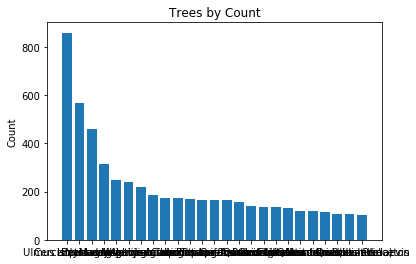

In [34]:
labels = topSciNames.sci_name
counts = topSciNames.counts

y_positions = range(len(labels))

plt.bar(y_positions, counts)
plt.xticks(y_positions, labels)
plt.ylabel("Count")
plt.title("Trees by Count")
plt.show

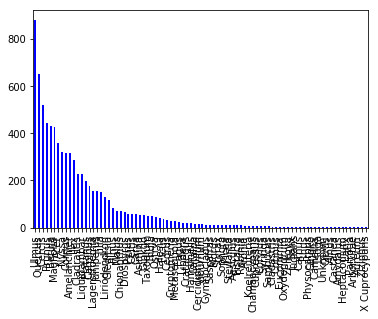

In [38]:
ss[(ss.isAlive == 1)].db_Genus.value_counts().plot(kind='bar', color='b');

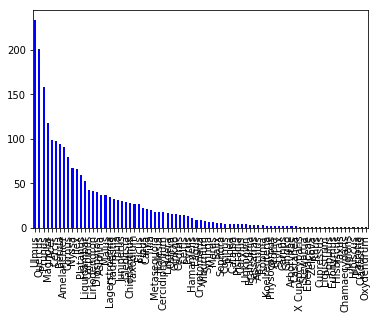

In [37]:
ss[(ss.isAlive == 0)].db_Genus.value_counts().plot(kind='bar', color='b');

In [ ]:
SciNameCounts = ss.SciName.value_counts().rename_axis('sci_name').reset_index(name='counts')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(SciNameCounts)

In [ ]:
topSciNames = SciNameCounts[SciNameCounts.counts > 100]
topSciNames 

In [ ]:
genus_counts = ss.db_Genus.value_counts().rename_axis('db_Genus').reset_index(name='counts')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(genus_counts)